# Solving Natural_Image Classification using FastAI

**What is fast.ai?**

It is an opensource deep learning framework built on Pytorch co-founded by Jeremy Howard and Rachel Thomas. The motto of this framework is to make deep learning accessible to professionals from different backgrounds. It contains high-level components that can easily provide state-of-the-art results in standard deep learning domains.

**Dataset**

The dataset contains images enclosed in six different folders labelled with their respective classes ['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

In [1]:
#setting up out enviroment
import warnings
warnings.filterwarnings('ignore')

#setting up our enviroment
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [14]:
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np

In [15]:
#initializing the data path
x  = '../input/natural-images/natural_images/'
path = Path(x)
path.ls()

[PosixPath('../input/natural-images/natural_images/motorbike'),
 PosixPath('../input/natural-images/natural_images/flower'),
 PosixPath('../input/natural-images/natural_images/fruit'),
 PosixPath('../input/natural-images/natural_images/cat'),
 PosixPath('../input/natural-images/natural_images/dog'),
 PosixPath('../input/natural-images/natural_images/airplane'),
 PosixPath('../input/natural-images/natural_images/car'),
 PosixPath('../input/natural-images/natural_images/person')]

**Viewing the data**

Fastai contains data objects called databunches to load the dataset and train the model. To view the image data, we would be using ImageDataBunch.from_folder().

In [16]:
np.random.seed(40)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224,
                                  num_workers=4).normalize(imagenet_stats)

In [17]:
data.classes

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

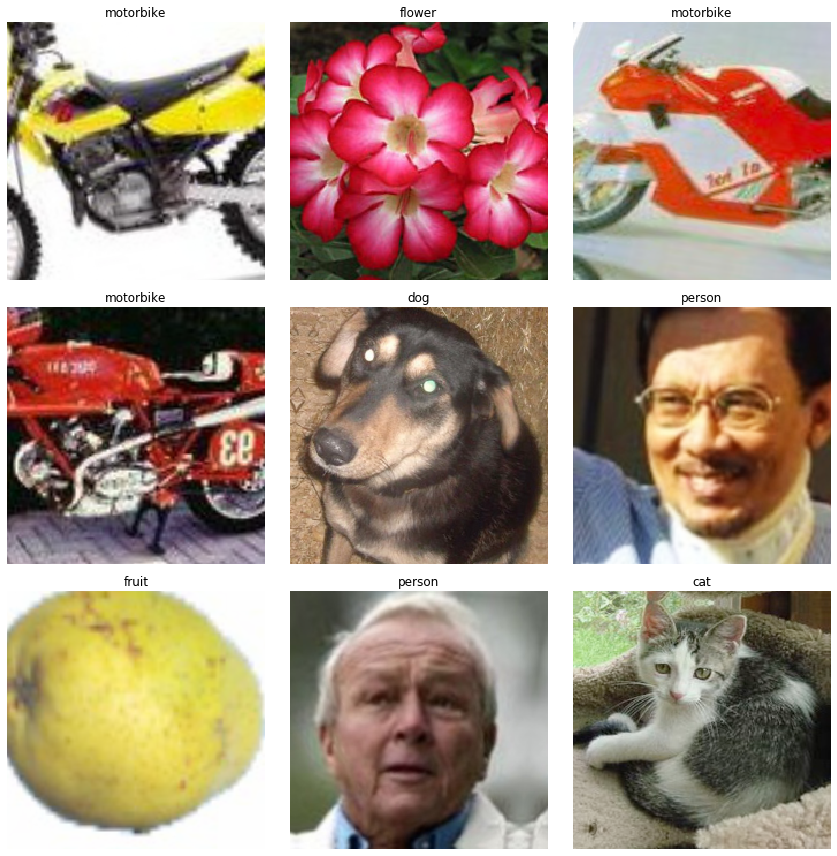

In [22]:
data.show_batch(3, fig_size=(7,6))
data.classes

**Model creation and training**


Image classification is usually done using convolutional neural networks. Fastai’s learner lets you create models within few lines of code. Convolutional neural network can be directly created using method called cnn_learner. This method takes two arguments namely data and model architecture, but also supports additional arguments for customizing the model. For our model, we would be using resnet34 architecture with weights pretrained on imagenets. To fit the model, we would be using fit_one_cycle method which basically changes the learning rate to achieve better results. By default, only top fully connected layers are unfrozen (which can be trained).

In [29]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy, callback_fns=ShowGraph)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.256429,0.011008,0.996374,01:10
1,0.062650,0.016900,0.995649,01:08
2,0.029978,0.019954,0.995649,01:09
3,0.017989,0.014745,0.997099,01:09


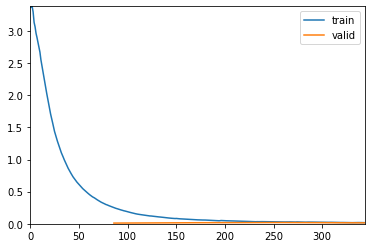

In [31]:
learn.fit_one_cycle(4)

**Results**


To interpret the results, we can use fastai’s ClassificationInterpretation class. To create an interpretation object we need to call the from_learner method and pass it our learner/model.

In [32]:
interp = ClassificationInterpretation.from_learner(learn)

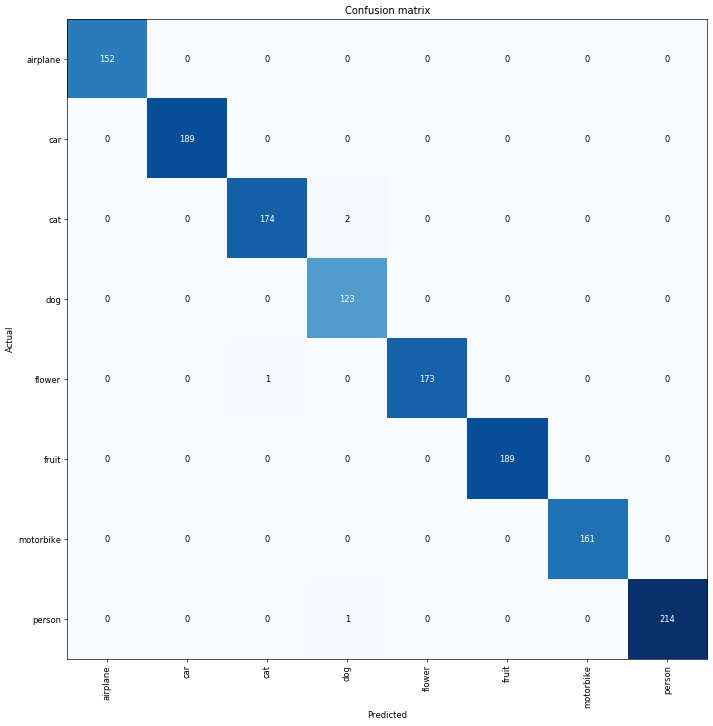

In [33]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

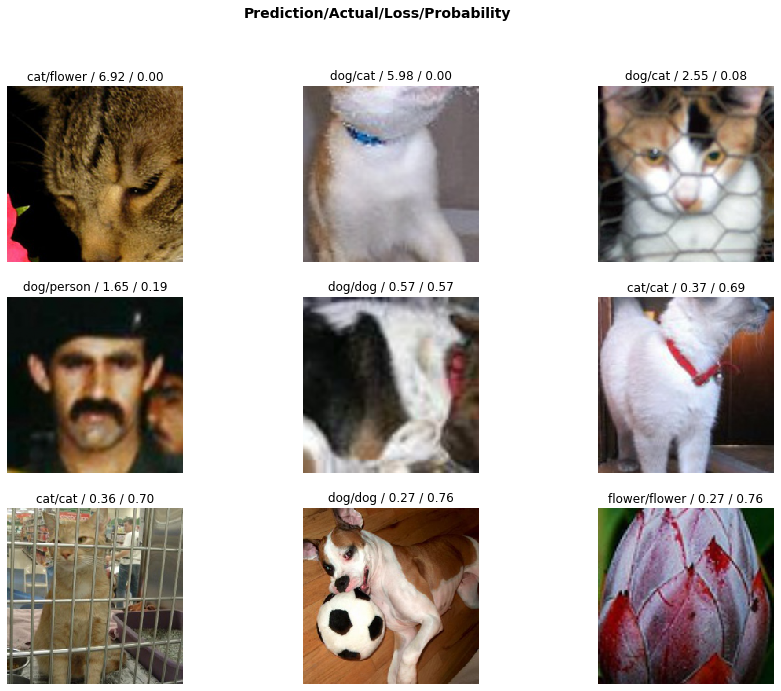

In [35]:
interp.plot_top_losses(9, figsize=(15,11))

We can observe that the final accuracy of the model is 99.7099% which is quite outstanding